[View in Colaboratory](https://colab.research.google.com/github/kushsharma1001/Deep-Learning/blob/master/8)%20Digit%20Recognition%20using%20MNIST%20dataset.ipynb)

In [1]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)


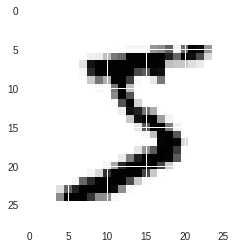

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, (1,7), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, (7,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10, 1))
model.add(Convolution2D(10, 11))

model.add(Flatten())
model.add(Activation('softmax'))

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 28, 22, 32)        256       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 22, 22, 32)        7200      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 11, 11, 10)        330       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 1, 1, 10)          12110     
_________________________________________________________________
flatten_16 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_16 (Activation)   (None, 10)                0         
Total para

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [48]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1919 - acc: 0.9442
Epoch 2/10
 2336/60000 [>.............................] - ETA: 1:15 - loss: 0.0723 - acc: 0.9799

60000/60000 [==============================] - 79s 1ms/step - loss: 0.0689 - acc: 0.9788
Epoch 3/10
 6944/60000 [==>...........................] - ETA: 1:09 - loss: 0.0483 - acc: 0.9856

60000/60000 [==============================] - 78s 1ms/step - loss: 0.0536 - acc: 0.9835
Epoch 4/10
 9312/60000 [===>..........................] - ETA: 1:06 - loss: 0.0410 - acc: 0.9867

60000/60000 [==============================] - 78s 1ms/step - loss: 0.0454 - acc: 0.9861
Epoch 5/10
10464/60000 [====>.........................] - ETA: 1:03 - loss: 0.0352 - acc: 0.9893

60000/60000 [==============================] - 76s 1ms/step - loss: 0.0383 - acc: 0.9882
Epoch 6/10
10880/60000 [====>.........................] - ETA: 1:02 - loss: 0.0335 - acc: 0.9892

60000/60000 [==============================] - 75s 1ms/step - loss: 0.0329 - acc: 0.9898
Epoch 7/10
11808/60000 [====>.........................] - ETA: 59s - loss: 0.0262 - acc: 0.9919

60000/60000 [==============================] - 76s 1ms/step - loss: 0.0292 - acc: 0.9906
Epoch 8/10
11840/60000 [====>.........................] - ETA: 1:01 - loss: 0.0244 - acc: 0.9922

60000/60000 [==============================] - 76s 1ms/step - loss: 0.0245 - acc: 0.9920
Epoch 9/10
11680/60000 [====>.........................] - ETA: 1:01 - loss: 0.0215 - acc: 0.9939

60000/60000 [==============================] - 76s 1ms/step - loss: 0.0221 - acc: 0.9929
Epoch 10/10
11392/60000 [====>.........................] - ETA: 1:03 - loss: 0.0144 - acc: 0.9951

60000/60000 [==============================] - 78s 1ms/step - loss: 0.0195 - acc: 0.9933


In [49]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.039219321940781086, 0.9878]


In [0]:
y_pred = model.predict(X_test)

In [51]:
print(y_pred[:9])
print(y_test[:9])

[[2.3475932e-10 1.1515238e-09 1.8089858e-07 7.1310028e-06 9.6611850e-15
  1.3406835e-10 4.3903273e-17 9.9999261e-01 6.3606196e-09 1.8388254e-08]
 [3.3988963e-09 3.6662566e-08 9.9999988e-01 2.1206728e-12 5.2591069e-16
  6.9254758e-16 6.5483370e-08 6.2052907e-13 6.0216604e-10 5.3501448e-12]
 [1.5709930e-06 9.9991155e-01 1.6510541e-05 2.1123919e-08 2.5800231e-05
  2.7508372e-07 1.2139664e-05 1.8599139e-06 3.0191211e-05 4.0286590e-08]
 [9.9888283e-01 1.8919095e-11 1.0085107e-03 8.9879419e-09 2.4326670e-08
  3.8861959e-05 2.9528775e-05 1.1644691e-08 4.0011608e-05 1.9936525e-07]
 [1.1765757e-13 4.7842319e-10 4.7099352e-13 6.0695433e-12 1.0000000e+00
  2.5286075e-13 1.1012277e-12 6.9525907e-10 9.1223109e-09 2.7309355e-08]
 [2.7127271e-07 9.9989009e-01 1.5911645e-07 1.0372133e-08 5.0867373e-05
  1.4257366e-09 1.4674209e-06 1.1090199e-05 4.5854937e-05 1.3664470e-07]
 [1.5659536e-16 8.4199874e-09 4.2701949e-08 8.1356526e-11 9.9960476e-01
  6.5073307e-09 4.8288990e-12 5.0144944e-08 2.9392011e-04 

In [55]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_46': <keras.layers.convolutional.Conv2D object at 0x7fb992244940>, 'conv2d_47': <keras.layers.convolutional.Conv2D object at 0x7fb99222dd68>, 'max_pooling2d_7': <keras.layers.pooling.MaxPooling2D object at 0x7fb9922a1b70>, 'conv2d_48': <keras.layers.convolutional.Conv2D object at 0x7fb99222d240>, 'conv2d_49': <keras.layers.convolutional.Conv2D object at 0x7fb992299400>, 'flatten_16': <keras.layers.core.Flatten object at 0x7fb99228ec50>, 'activation_16': <keras.layers.core.Activation object at 0x7fb99227a160>}


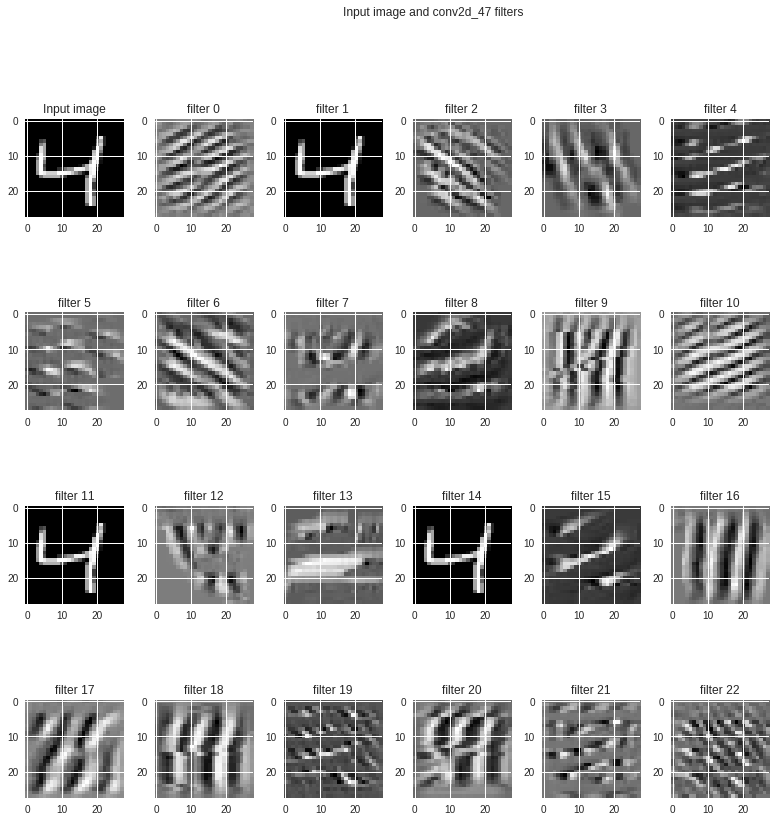

In [56]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_47'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()